In [71]:
import numpy as np
import gc
from matplotlib import pyplot as plt
import time 

import sys
sys.path.append('/dipc/kstoreyf/muchisimocks/scripts')
import compute_statistics as cs
import data_loader
import utils
import plotter

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load tracer field

In [2]:
tag_params = '_shame_p0_n1000'
box_size = 1000.0
dir_mocks = f'/scratch/kstoreyf/muchisimocks/muchisimocks_lib{tag_params}'
idx_mock = 0
fn_fields = f'{dir_mocks}/mock{idx_mock}/bias_fields_eul_deconvolved_{idx_mock}.npy'
bias_terms_eul = np.load(fn_fields)

In [3]:
params_df, param_dict_fixed = data_loader.load_cosmo_params(tag_params)
if params_df is None:
    param_dict = param_dict_fixed
else:
    param_dict = params_df.iloc[0].to_dict()
    param_dict.update(param_dict_fixed)
cosmo = utils.get_cosmo(param_dict)

In [4]:
tag_mock = '_nbar0.00022'
param_dict_forbias = data_loader.load_params_ood('shame', tag_mock)
bias_vector = [param_dict_forbias[name] for name in utils.biasparam_names_ordered]

In [5]:
n_grid_orig = 512
bs = np.concatenate(([1.0], bias_vector))
tracer_field_det = utils.get_tracer_field(bias_terms_eul, bias_vector, n_grid_orig, 
                                             noise_field=None, A_noise=None)

# Power spectra

In [49]:
k_min = 0.01
k_max = 0.4
n_bins = 30
pk_obj = cs.compute_pk(tracer_field_det, cosmo, box_size, k_min=k_min, k_max=k_max, n_bins=n_bins, n_threads=1, fn_stat=None)


Computing pk, using n_grid =  128


2026-02-19 09:31:59,802 bacco.statistics : Computing the power spectrum with ngrid=128 and interlacing=False
2026-02-19 09:31:59,885 bacco.statistics :  ...done in 0.0829 s


bacco.power : boxsize 1000.000000; ngrid 128; nthreads 1; interlacing 0; deposit_method 1; log_binning 1; type 1; precision=single; correct_grid=0 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=0 deconvolve_grid2=0
bacco.power : total mass 0.999999 (grid1) 0.999999 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.013550 sec
bacco.power : Counting modes
bacco.power : done counting modes in 0.042828 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.000135 secs
bacco.power : Deallocating arrays


In [50]:
log_k_min = np.log10(k_min)
log_k_max = np.log10(k_max)
dlog = (log_k_max - log_k_min) / (n_bins - 1)
log_last_edge = log_k_max + dlog
edges = np.logspace(log_k_min, log_last_edge, n_bins + 1)
centers = np.sqrt(edges[:-1] * edges[1:])
print('edges', edges)
print('centers', centers)
print('pk_obj["k"]', pk_obj['k'])

edges [0.01       0.01135647 0.01289695 0.01464638 0.01663312 0.01888936
 0.02145165 0.02436151 0.02766608 0.0314189  0.03568079 0.04052079
 0.04601733 0.05225945 0.0593483  0.06739873 0.07654118 0.08692378
 0.09871475 0.11210514 0.12731189 0.14458139 0.16419346 0.18646585
 0.21175943 0.24048401 0.273105   0.31015094 0.35222205 0.4
 0.45425889]
centers [0.01065668 0.01210222 0.01374386 0.01560817 0.01772538 0.02012978
 0.02286033 0.02596127 0.02948284 0.03348211 0.03802386 0.04318169
 0.04903917 0.0556912  0.06324555 0.07182464 0.08156745 0.09263185
 0.1051971  0.1194668  0.13567214 0.15407569 0.17497564 0.1987106
 0.22566514 0.25627599 0.29103912 0.33051777 0.3753516  0.426267  ]
pk_obj["k"] [0.01065667 0.01210222 0.01374386 0.01560817 0.01772538 0.02012978
 0.02286032 0.02596126 0.02948284 0.0334821  0.03802386 0.04318169
 0.04903917 0.05569119 0.06324555 0.07182463 0.08156745 0.09263184
 0.1051971  0.11946679 0.13567213 0.15407568 0.17497562 0.19871058
 0.22566512 0.25627597 0.29103

BACCO adding an extra bin ?!

In [51]:
k_min_new = 0.01
k_max_new = 0.4
n_bins_new = 40
pk_obj_new = cs.compute_pk(tracer_field_det, cosmo, box_size, k_min=k_min_new, k_max=k_max_new, n_bins=n_bins_new, n_threads=1, fn_stat=None)
print(pk_obj_new['k'])
print(pk_obj_new['k'].shape)
print(pk_obj_new['pk'])

Computing pk, using n_grid =  128


2026-02-19 09:32:18,115 bacco.statistics : Computing the power spectrum with ngrid=128 and interlacing=False
2026-02-19 09:32:18,193 bacco.statistics :  ...done in 0.0783 s


bacco.power : boxsize 1000.000000; ngrid 128; nthreads 1; interlacing 0; deposit_method 1; log_binning 1; type 1; precision=single; correct_grid=0 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=0 deconvolve_grid2=0
bacco.power : total mass 0.999999 (grid1) 0.999999 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.013413 sec
bacco.power : Counting modes
bacco.power : done counting modes in 0.041808 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.000160 secs
bacco.power : Deallocating arrays
[0.01048429 0.01152438 0.01266765 0.01392434 0.01530569 0.01682409
 0.01849311 0.02032771 0.02234431 0.02456096 0.02699752 0.02967579
 0.03261976 0.03585578 0.03941283 0.04332276 0.04762057 0.05234474
 0.05753757 0.06324555 0.06951979 0.07641646 0.08399731 0.09233021
 0.10148977 0.111558   0.12262505 0.13479    0.14816176 0.16286006
 0.17901649 0.19677572 0.21629674 0.23775433 0.2613406  0.28726674
 0.31576487 0.34709014 

In [52]:
log_k_min = np.log10(k_min_new)
log_k_max = np.log10(k_max_new)
dlog = (log_k_max - log_k_min) / (n_bins_new - 1)
log_last_edge = log_k_max + dlog
edges = np.logspace(log_k_min, log_last_edge, n_bins + 1)
centers = np.sqrt(edges[:-1] * edges[1:])
print('edges', edges)
print('centers', centers)
print('pk_obj["k"]', pk_obj['k'])

edges [0.01       0.01134413 0.01286893 0.01459869 0.01656095 0.01878696
 0.02131217 0.02417681 0.02742649 0.03111297 0.03529497 0.04003908
 0.04542086 0.05152603 0.05845181 0.0663085  0.07522124 0.08533197
 0.09680172 0.10981315 0.12457349 0.14131782 0.1603128  0.18186096
 0.20630548 0.23403566 0.26549315 0.30117894 0.34166138 0.38758519
 0.43968176]
centers [0.01065088 0.0120825  0.01370655 0.01554889 0.01763887 0.02000977
 0.02269935 0.02575044 0.02921164 0.03313807 0.03759226 0.04264516
 0.04837723 0.05487977 0.06225634 0.07062442 0.08011727 0.09088609
 0.10310239 0.11696071 0.13268178 0.15051596 0.1707473  0.19369799
 0.21973357 0.24926866 0.28277367 0.32078219 0.36389956 0.41281247]
pk_obj["k"] [0.01065667 0.01210222 0.01374386 0.01560817 0.01772538 0.02012978
 0.02286032 0.02596126 0.02948284 0.0334821  0.03802386 0.04318169
 0.04903917 0.05569119 0.06324555 0.07182463 0.08156745 0.09263184
 0.1051971  0.11946679 0.13567213 0.15407568 0.17497562 0.19871058
 0.22566512 0.25627597

In [53]:
k_min_new_lowkmax = 0.01
k_max_new_lowkmax = 0.32
n_bins_new_lowkmax = 40
pk_obj_new_lowkmax = cs.compute_pk(tracer_field_det, cosmo, box_size, k_min=k_min_new_lowkmax, k_max=k_max_new_lowkmax, n_bins=n_bins_new_lowkmax, n_threads=1, fn_stat=None)
print(pk_obj_new_lowkmax['k'])
print(pk_obj_new_lowkmax['k'].shape)
print(pk_obj_new_lowkmax['pk'])

Computing pk, using n_grid =  128


2026-02-19 09:32:46,400 bacco.statistics : Computing the power spectrum with ngrid=128 and interlacing=False
2026-02-19 09:32:46,468 bacco.statistics :  ...done in 0.068 s


bacco.power : boxsize 1000.000000; ngrid 128; nthreads 1; interlacing 0; deposit_method 1; log_binning 1; type 1; precision=single; correct_grid=0 (log=1); correct_sn=0
bacco.power : normalise_grid1=0 normalise_grid2=0 deconvolve_grid1=0 deconvolve_grid2=0
bacco.power : total mass 0.999999 (grid1) 0.999999 (grid2)
bacco.power : Doing FFTW
bacco.power: FFT took 0.014668 sec
bacco.power : Counting modes
bacco.power : done counting modes in 0.033244 sec
bacco.power : Starting Fourier loop 
bacco.power : done Fourier loop in 0.000165 secs
bacco.power : Deallocating arrays
[0.01045434 0.0114259  0.01248774 0.01364827 0.01491664 0.01630289
 0.01781797 0.01947385 0.02128362 0.02326157 0.02542334 0.02778601
 0.03036826 0.03319047 0.03627497 0.03964611 0.04333055 0.04735739
 0.05175846 0.05656854 0.06182563 0.06757128 0.07385089 0.08071408
 0.0882151  0.0964132  0.10537318 0.11516584 0.12586856 0.13756592
 0.15035035 0.16432288 0.17959392 0.19628414 0.21452544 0.23446196
 0.25625125 0.28006548 

In [54]:
log_k_min = np.log10(k_min_new_lowkmax)
log_k_max = np.log10(k_max_new_lowkmax)
dlog = (log_k_max - log_k_min) / (n_bins_new_lowkmax - 1)
log_last_edge = log_k_max + dlog
edges = np.logspace(log_k_min, log_last_edge, n_bins + 1)
centers = np.sqrt(edges[:-1] * edges[1:])
print('edges', edges)
print('centers', centers)
print('pk_obj["k"]', pk_obj['k'])

edges [0.01       0.01125792 0.01267407 0.01426837 0.01606322 0.01808384
 0.02035864 0.02291959 0.02580269 0.02904846 0.03270252 0.03681623
 0.04144741 0.04666116 0.05253076 0.0591387  0.06657787 0.07495283
 0.08438129 0.09499577 0.10694547 0.12039834 0.13554348 0.15259375
 0.1717888  0.19339844 0.2177264  0.24511462 0.27594805 0.31066008
 0.3497386 ]
centers [0.01061033 0.01194503 0.01344762 0.01513922 0.01704361 0.01918756
 0.02160119 0.02431845 0.02737751 0.03082138 0.03469846 0.03906325
 0.04397709 0.04950905 0.05573689 0.06274814 0.07064135 0.07952745
 0.08953136 0.10079368 0.11347271 0.12774666 0.14381616 0.16190706
 0.18227366 0.20520221 0.23101498 0.2600748  0.2927901  0.32962072]
pk_obj["k"] [0.01065667 0.01210222 0.01374386 0.01560817 0.01772538 0.02012978
 0.02286032 0.02596126 0.02948284 0.0334821  0.03802386 0.04318169
 0.04903917 0.05569119 0.06324555 0.07182463 0.08156745 0.09263184
 0.1051971  0.11946679 0.13567213 0.15407568 0.17497562 0.19871058
 0.22566512 0.25627597

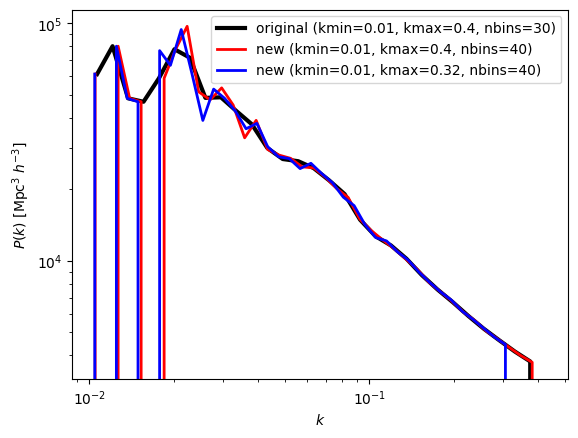

In [55]:
plt.plot(pk_obj['k'], pk_obj['pk'], color='k', lw=3, label=f'original (kmin={k_min}, kmax={k_max}, nbins={n_bins})',)
plt.plot(pk_obj_new['k'], pk_obj_new['pk'], color='r', lw=2, label=f'new (kmin={k_min_new}, kmax={k_max_new}, nbins={n_bins_new})')
plt.plot(pk_obj_new_lowkmax['k'], pk_obj_new_lowkmax['pk'], color='b', lw=2, label=f'new (kmin={k_min_new_lowkmax}, kmax={k_max_new_lowkmax}, nbins={n_bins_new_lowkmax})')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k$')
plt.ylabel(r'$P(k)$ [Mpc$^3$ $h^{-3}$]')
plt.legend()

# Bispectra

In [57]:
n_grid = 128
n_grid_orig = 512
box_size = 1000.0
base = cs.setup_bispsec(box_size, n_grid, n_threads=1)


# Dimensions: [1.00e+03, 1.00e+03, 1.00e+03] Mpc/h
# Center: [0.00e+00, 0.00e+00, 0.00e+00] Mpc/h
# Line-of-sight: global
# Fourier-space grid: [128, 128, 128]
# Fundamental frequency: [0.006, 0.006, 0.006] h/Mpc
# Nyquist frequency: [0.402, 0.402, 0.402] h/Mpc
# Pixel window: none
# Using fftw backend
PolyBin3D setup time: 0.19 s


In [58]:
bspec, bk_corr = cs.compute_bispectrum(base, tracer_field_det)
k123 = bspec.get_ks()
weight = k123.prod(axis=0)
norm = n_grid**3
bk = norm**3 * weight * bk_corr['b0']


Binning: 7 bins in [0.010, 0.400] h/Mpc
Squezed binning: 7 bins in [0.010, 0.400] h/Mpc
l-max: 1
N_bins: 50
Mask: constant
Computing degeneracy factor
Computing ideal Fisher matrix


Text(0, 0.5, '$k_1k_2k_3\\,B_\\ell(k_1,k_2,k_3)$')

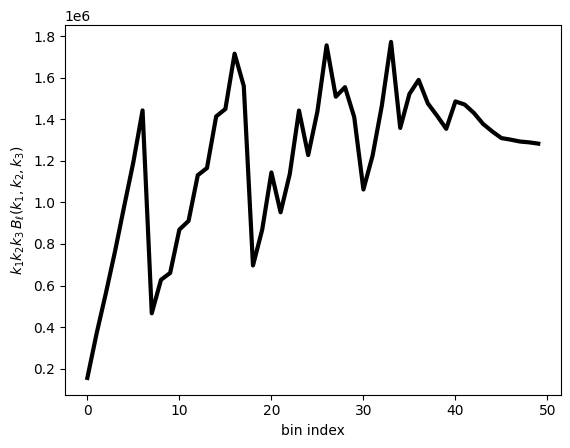

In [60]:
plt.plot(bk, color='k', lw=3, label='mock')
plt.xlabel('bin index')
plt.ylabel(r'$k_1k_2k_3\,B_\ell(k_1,k_2,k_3)$')

In [64]:
k_min = 0.01
k_max = 0.4
n_bins = 7
bspec, bk_corr = cs.compute_bispectrum(base, tracer_field_det, k_min=k_min, k_max=k_max, n_bins=n_bins)
k123 = bspec.get_ks()
print(np.unique(k123))


Binning: 7 bins in [0.010, 0.400] h/Mpc
Squezed binning: 7 bins in [0.010, 0.400] h/Mpc
l-max: 1
N_bins: 50
Mask: constant
Computing degeneracy factor
Computing ideal Fisher matrix
[0.03785714 0.09357143 0.14928571 0.205      0.26071429 0.31642857
 0.37214286]


In [68]:
edges = np.logspace(np.log10(k_min), np.log10(k_max), n_bins+1)
centers = np.exp(0.5 * (np.log(edges[:-1]) + np.log(edges[1:])))
#centers = np.sqrt(edges[:-1] * edges[1:])
print(edges)
print(centers)


[0.01       0.01693814 0.02869006 0.04859562 0.08231194 0.13942112
 0.23615344 0.4       ]
[0.01301466 0.02204441 0.03733914 0.06324555 0.1071262  0.18145186
 0.3073457 ]


In [87]:
n_bins_arr = [7, 10, 12, 15]
bspec_arr = []
bk_corr_arr = []
time_arr = []
for n_bins in n_bins_arr:
    start = time.time()
    bspec, bk_corr = cs.compute_bispectrum(base, tracer_field_det, k_min=0.01, k_max=0.4, n_bins=n_bins)
    end = time.time()
    print(f'time taken: {end-start} seconds')
    k123 = bspec.get_ks()
    print(np.unique(k123))
    bspec_arr.append(bspec)
    bk_corr_arr.append(bk_corr)
    time_arr.append(end-start)
    


Binning: 7 bins in [0.010, 0.400] h/Mpc
Squezed binning: 7 bins in [0.010, 0.400] h/Mpc
l-max: 1
N_bins: 50
Mask: constant
Computing degeneracy factor
Computing ideal Fisher matrix
time taken: 3.5163514614105225 seconds
[0.03785714 0.09357143 0.14928571 0.205      0.26071429 0.31642857
 0.37214286]

Binning: 10 bins in [0.010, 0.400] h/Mpc
Squezed binning: 10 bins in [0.010, 0.400] h/Mpc
l-max: 1
N_bins: 125
Mask: constant
Computing degeneracy factor
Computing ideal Fisher matrix
time taken: 6.772121906280518 seconds
[0.0295 0.0685 0.1075 0.1465 0.1855 0.2245 0.2635 0.3025 0.3415 0.3805]

Binning: 12 bins in [0.010, 0.400] h/Mpc
Squezed binning: 12 bins in [0.010, 0.400] h/Mpc
l-max: 1
N_bins: 203
Mask: constant
Computing degeneracy factor
Computing ideal Fisher matrix
time taken: 13.48341703414917 seconds
[0.02625 0.05875 0.09125 0.12375 0.15625 0.18875 0.22125 0.25375 0.28625
 0.31875 0.35125 0.38375]

Binning: 15 bins in [0.010, 0.400] h/Mpc
Squezed binning: 15 bins in [0.010, 0.40

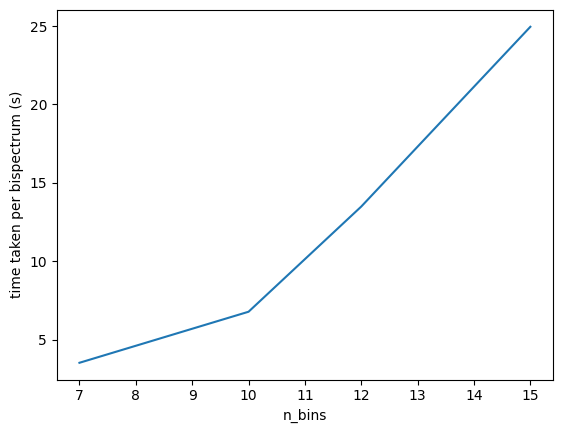

In [88]:
plt.plot(n_bins_arr, time_arr)
plt.xlabel('n_bins')
plt.ylabel('time taken per bispectrum (s)')
plt.show()


In [89]:
n_bins_tot_arr = []
n_bins_less_than_kthresh_arr = []
for i in range(len(n_bins_arr)):
    bspec = bspec_arr[i]
    ks = bspec.get_ks()
    k_thresh = 0.25
    mask = np.all(ks<k_thresh, axis=0)
    n_less_than_kthresh = np.sum(mask)
    n_bins_tot_arr.append(ks.shape[1])
    n_bins_less_than_kthresh_arr.append(n_less_than_kthresh)

print(n_bins_tot_arr)
print(n_bins_less_than_kthresh_arr)

[50, 125, 203, 372]
[13, 34, 50, 95]


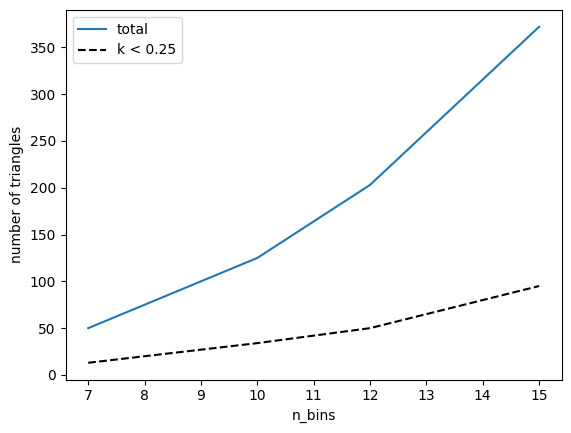

In [90]:
plt.plot(n_bins_arr, n_bins_tot_arr, label='total')
plt.plot(n_bins_arr, n_bins_less_than_kthresh_arr, 'k--', label='k < 0.25')
plt.xlabel('n_bins')
plt.ylabel('number of triangles')
plt.legend()
plt.show()